In [ ]:
#clear all varaibles
%reset

In [11]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.special import legendre
from mpmath import coulombf, coulombg, mp
from scipy.interpolate import interp1d
import csv

In [21]:
df_0p66C = pd.read_csv('0p66MeVCoincidence.csv')

en_a_01 = np.array(df_0p66C["en_a_01"])
en_a_11 = np.array(df_0p66C["en_a_11"])
en_a_12 = np.array(df_0p66C["en_a_12"])
a_01_det = np.array(df_0p66C["a_01_det"])
a_11_det = np.array(df_0p66C["a_11_det"])
a_12_det = np.array(df_0p66C["a_12_det"])

In [24]:
df_0p66C

,Unnamed: 0,en_a_01,en_a_11,en_a_12,a_01_det,a_11_det,a_12_det,multiple_det
0,32,3.870531,0.533623,4.948846,NaN,4.0,7.0,True
1,187,4.138547,3.958808,1.255645,6.0,NaN,3.0,True
2,275,4.308182,3.823538,1.221279,NaN,3.0,0.0,True
3,330,3.513963,1.193772,4.645265,6.0,1.0,NaN,True
4,360,3.724895,4.039042,1.589063,NaN,1.0,2.0,True
...,...,...,...,...,...,...,...,...
46689,3581675,4.502424,0.156659,4.693917,7.0,NaN,3.0,True
46690,3581711,4.156484,2.622824,2.573692,7.0,1.0,NaN,True
46691,3581811,4.875347,1.387059,3.090594,NaN,3.0,5.0,True
46692,3581868,4.814610,0.976400,3.561990,NaN,3.0,5.0,True


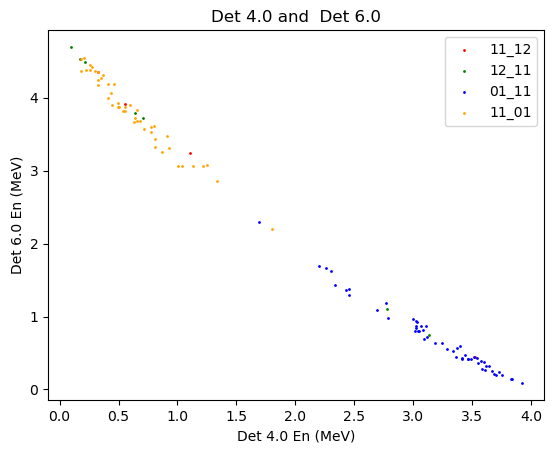

In [93]:
sel_det1 = 4.0
sel_det2 = 6.0

where_det_hit_11_12 = np.logical_and(a_11_det==sel_det1,a_12_det==sel_det2)
where_det_hit_12_11 = np.logical_and(a_12_det==sel_det1,a_11_det==sel_det2)
where_det_hit_01_11 = np.logical_and(a_01_det==sel_det1,a_11_det==sel_det2)
where_det_hit_11_01 = np.logical_and(a_11_det==sel_det1,a_01_det==sel_det2)

#where_det_hit_01_12 = np.logical_and(a_01_det==sel_det1,a_12_det==sel_det2)

plt.scatter(en_a_11[where_det_hit_11_12],en_a_12[where_det_hit_11_12],c="red",label="11_12",s=1)
plt.scatter(en_a_12[where_det_hit_12_11],en_a_11[where_det_hit_12_11],c="green",label="12_11",s=1)

plt.scatter(en_a_01[where_det_hit_01_11],en_a_11[where_det_hit_01_11],c="blue",label="01_11",s=1)
plt.scatter(en_a_11[where_det_hit_11_01],en_a_01[where_det_hit_11_01],c="orange",label="11_01",s=1)


#plt.scatter(en_a_01[where_det_hit_01_12],en_a_12[where_det_hit_01_12],c="blue")
plt.title("Det "+str(sel_det1)+" and "+" "+ "Det "+str(sel_det2))
plt.xlabel("Det "+str(sel_det1) + " En (MeV)")
plt.ylabel("Det "+str(sel_det2) + " En (MeV)")
plt.legend()

In [ ]:
sum(where_det_hit_11_12)

633

In [80]:
sum(where_det_hit_01_11)

209